## Skrypt uzupełniający braki danych w otrzymanym pliku

1) Wczytanie

In [28]:
import pandas as pd

df = pd.read_csv("../data/dane-zeliwo.csv")
del df['Unnamed: 0']
df.head()

test = pd.read_csv("../data/test.csv")
del test['Unnamed: 0']


In [29]:
test.head()

,Nr źródła,C [%],Si [%],S [%],P [%],Mg [%],Mn [%],Ni [%],Cu [%],Mo [%],...,Unnamed: 32,Rm [MPa],"R0,2 [MPa]",A5 [%],Twardość Brinella [HB],Udarność Charpy [J],Temperatura pomiaru udarności [˚C],Martensite volume fraction Xα',Udział austenitu szczątkowego XγR,Zawartość węgla w austenicie
0,200,3.63,2.52,0.013,0.028,0.0043,0.162,0.024,0.215,0.002,...,NaN,921.0,NaN,5.3,323.0,NaN,NaN,NaN,17.6,NaN
1,200,3.63,2.52,0.013,0.028,0.0043,0.162,0.024,0.215,0.002,...,NaN,847.0,NaN,6.1,331.0,NaN,NaN,NaN,21.2,NaN
2,200,3.63,2.52,0.013,0.028,0.0043,0.162,0.024,0.215,0.002,...,NaN,812.0,NaN,7.4,319.0,NaN,NaN,NaN,25.4,NaN
3,200,3.63,2.52,0.013,0.028,0.0043,0.162,0.024,0.215,0.002,...,NaN,772.0,NaN,8.4,302.0,NaN,NaN,NaN,30.2,NaN
4,200,3.63,2.52,0.013,0.028,0.0043,0.162,0.024,0.215,0.002,...,NaN,952.0,NaN,5.1,325.0,NaN,NaN,NaN,NaN,NaN


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 41 columns):
Nr źródła                                   1505 non-null object
C [%]                                       1441 non-null float64
Si [%]                                      1441 non-null float64
S [%]                                       1377 non-null float64
P [%]                                       1362 non-null float64
Mg [%]                                      1278 non-null float64
Mn [%]                                      1402 non-null float64
Ni [%]                                      1261 non-null float64
Cu [%]                                      1225 non-null float64
Mo [%]                                      1062 non-null float64
Cr [%]                                      475 non-null float64
Al [%]                                      413 non-null float64
Sn [%]                                      410 non-null float64
B [%]                                  

2) Uzupełnienie braków danych

* kolumny C, Si, S, P, Mg, Mn, Ni - te pierwiastki w składzie chemicznym muszą być (zgodnie z notatkami), nie można ich uzupełnić wartością $0$, więc każda z nich zostanie uzupełniona medianą

In [31]:
test.columns

Index(['Nr źródła', 'C [%]', 'Si [%]', 'S [%]', 'P [%]', 'Mg [%]', 'Mn [%]',
       'Ni [%]', 'Cu [%]', 'Mo [%]', 'Cr [%]', 'Al [%]', 'Sn [%]', 'B [%]',
       'V [%]', 'Wydzielenia grafitu [mm-2]', 'Udział wydzieleń grafitu [%]',
       'Średnica sferoidów [μm]', 'Nodularity [%]', 'Udział perlitu [%]',
       'Udział ferrytu [%]', 'Rm [MPa] (as cast)', 'A5 [%]     (as cast)',
       'Temperatura austenityzacji [˚C]', 'Czas austenityzacji [min.]',
       'Temperatura przemiany izotermicznej [˚C]',
       'Czas przemiany izotermicznej [min.]', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Rm [MPa]',
       'R0,2 [MPa]', 'A5 [%]', 'Twardość Brinella [HB]', 'Udarność Charpy [J]',
       'Temperatura pomiaru udarności [˚C]', 'Martensite volume fraction Xα'',
       'Udział austenitu szczątkowego XγR ', 'Zawartość węgla w austenicie'],
      dtype='object')

In [32]:
pierwiastki = ['C', 'Si', 'S', 'P', 'Mg', 'Mn', 'Ni']
pierwiastki_procent = [p + ' [%]' for p in pierwiastki]


test.loc[:,pierwiastki_procent] = test.loc[
    :,pierwiastki_procent].fillna(df.loc[:,pierwiastki_procent
                                        ].median())

df.loc[:,pierwiastki_procent] = df.loc[
    :,pierwiastki_procent].fillna(df.loc[:,pierwiastki_procent
                                        ].median())

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 42 columns):
Nr źródła                                   98 non-null object
C [%]                                       98 non-null float64
Si [%]                                      98 non-null float64
S [%]                                       98 non-null float64
P [%]                                       98 non-null float64
Mg [%]                                      98 non-null float64
Mn [%]                                      98 non-null float64
Ni [%]                                      98 non-null float64
Cu [%]                                      98 non-null float64
Mo [%]                                      98 non-null float64
Cr [%]                                      98 non-null float64
Al [%]                                      60 non-null float64
Sn [%]                                      92 non-null float64
B [%]                                       60 non-null float64
V 

* zgodnie z notatkami Cu, Mo, Cr, Al, Sn, B, V - te pierwiastki występują w śladowych ilościach - roboczo uzupełnie braki wartością $0$

In [33]:
pierwiastki2 = ['Cu', 'Cr', 'Mo', 'Al', 'Sn', 'B', 'V']
pierwiastki_procent2 = [p + ' [%]' for p in pierwiastki2]
test.loc[:,pierwiastki_procent2] = test.loc[:,pierwiastki_procent2].fillna(0)
df.loc[:,pierwiastki_procent2] = df.loc[:,pierwiastki_procent2].fillna(0)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 42 columns):
Nr źródła                                   98 non-null object
C [%]                                       98 non-null float64
Si [%]                                      98 non-null float64
S [%]                                       98 non-null float64
P [%]                                       98 non-null float64
Mg [%]                                      98 non-null float64
Mn [%]                                      98 non-null float64
Ni [%]                                      98 non-null float64
Cu [%]                                      98 non-null float64
Mo [%]                                      98 non-null float64
Cr [%]                                      98 non-null float64
Al [%]                                      98 non-null float64
Sn [%]                                      98 non-null float64
B [%]                                       98 non-null float64
V 

* kolumny Udział perlitu [%] oraz Udział ferrytu [%] powinny się sumować do 100%, więc zrobię to, przy okazji uzupełniając dane

In [34]:
perlit = 'Udział perlitu [%]'
ferryt = 'Udział ferrytu [%]'

df.loc[(df[perlit].isna()) & (~df[ferryt].isna()),[perlit]] = 100 - df.loc[
    (df[perlit].isna()) & (~df[ferryt].isna()),[ferryt]]

df.loc[(df[ferryt].isna()) & (~df[perlit].isna()),[ferryt]] = 100 - df.loc[
    (df[ferryt].isna()) & (~df[perlit].isna()),[perlit]]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 41 columns):
Nr źródła                                   1505 non-null object
C [%]                                       1508 non-null float64
Si [%]                                      1508 non-null float64
S [%]                                       1508 non-null float64
P [%]                                       1508 non-null float64
Mg [%]                                      1508 non-null float64
Mn [%]                                      1508 non-null float64
Ni [%]                                      1508 non-null float64
Cu [%]                                      1508 non-null float64
Mo [%]                                      1508 non-null float64
Cr [%]                                      1508 non-null float64
Al [%]                                      1508 non-null float64
Sn [%]                                      1508 non-null float64
B [%]                               

Nie uzupełniło to braków :(

* Kolumny
    
    Rm [MPa] (as cast)
    
    A5 [%]     (as cast)
    
Te kolumny można uzupełnić na podstawie składu chemicznego, więc to zrobie.

### Rm [Mpa] (as cast) :

In [36]:
y = df.loc[~df['Rm [MPa] (as cast)'].isna(),:]['Rm [MPa] (as cast)']
X = df.loc[~df['Rm [MPa] (as cast)'].isna(),
           pierwiastki_procent + pierwiastki_procent2]
X.shape

(204, 14)

Jako, że pełnych obserwacji jest mało (204), to do oceny modelu uzupełniającego użyję cross walidacji (10-krotnej).

In [37]:
# modele
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

# metryki
from sklearn import metrics

# CV
from sklearn.model_selection import cross_val_score

metryka = 'neg_mean_absolute_error'
rf = RandomForestRegressor(n_estimators=500,criterion = 'mae')
lm = LinearRegression()
lasso = Lasso()


score = pd.DataFrame({
    "rf_score" : cross_val_score(rf, X, y, cv=10, scoring=metryka),
    "lm_score" : cross_val_score(lm, X, y, cv=10, scoring=metryka),
    "lasso_score" : cross_val_score(lasso, X, y, cv=10, scoring=metryka)
})


In [38]:
import seaborn as sns
ax = sns.boxplot(data=score, orient="h", palette="Set2")

Więc do uzupelnienia wybiore las losowy: 
* większa mediana
* może osiągać praktycznie zerowy błąd predykcji

Uzupełnienie:

In [39]:
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [40]:
X_do_uzupelnienia = df.loc[df['Rm [MPa] (as cast)'].isna(),
           pierwiastki_procent + pierwiastki_procent2]
X_do_uzupelnienia.shape

(1304, 14)

In [41]:
df.loc[df['Rm [MPa] (as cast)'].isna(),['Rm [MPa] (as cast)']] = rf.predict(
    X_do_uzupelnienia)

In [44]:
X_do_uzupelnienia = test.loc[test['Rm [MPa] (as cast)'].isna(),
           pierwiastki_procent + pierwiastki_procent2]
X_do_uzupelnienia.shape

(67, 14)

In [45]:
test.loc[test['Rm [MPa] (as cast)'].isna(),['Rm [MPa] (as cast)']] = rf.predict(
    X_do_uzupelnienia)

### Kolumna A5 [%]     (as cast)

In [46]:
y = df.loc[~df['A5 [%]     (as cast)'].isna(),:]['A5 [%]     (as cast)']
X = df.loc[~df['A5 [%]     (as cast)'].isna(),
           pierwiastki_procent + pierwiastki_procent2]
X.shape

(172, 14)

Jeszcze mniej obserwacji więc ponownie będzie to cross walidacja

In [47]:
metryka = 'neg_mean_absolute_error'
rf = RandomForestRegressor(n_estimators=500, criterion = 'mae')
lm = LinearRegression()
lasso = Lasso()


score = pd.DataFrame({
    "rf_score" : cross_val_score(rf, X, y, cv=10, scoring=metryka),
    "lm_score" : cross_val_score(lm, X, y, cv=10, scoring=metryka),
    "lasso_score" : cross_val_score(lasso, X, y, cv=10, scoring=metryka)
})

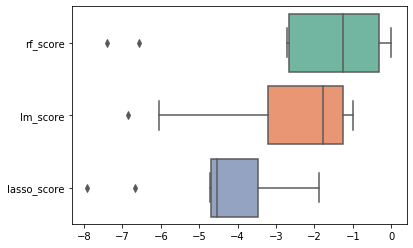

In [48]:
ax = sns.boxplot(data=score, orient="h", palette="Set2")

Ponownie uzupelnie braki przy pomocy lasu:
* są obserwacje dla których sie nie myli
* wyższa mediana

In [49]:
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [50]:
X_do_uzupelnienia = df.loc[df['A5 [%]     (as cast)'].isna(),
           pierwiastki_procent + pierwiastki_procent2]
X_do_uzupelnienia.shape

(1336, 14)

In [51]:
df.loc[df['A5 [%]     (as cast)'].isna(),['A5 [%]     (as cast)']
      ] = rf.predict(X_do_uzupelnienia)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 41 columns):
Nr źródła                                   1505 non-null object
C [%]                                       1508 non-null float64
Si [%]                                      1508 non-null float64
S [%]                                       1508 non-null float64
P [%]                                       1508 non-null float64
Mg [%]                                      1508 non-null float64
Mn [%]                                      1508 non-null float64
Ni [%]                                      1508 non-null float64
Cu [%]                                      1508 non-null float64
Mo [%]                                      1508 non-null float64
Cr [%]                                      1508 non-null float64
Al [%]                                      1508 non-null float64
Sn [%]                                      1508 non-null float64
B [%]                               

### Zapis tak uzupełnionych danych:

In [ ]:
df.to_csv("dane-zeliwo-uzupelnienie.csv")

Sprawdzenie

In [ ]:
df_uzup = pd.read_csv("dane-zeliwo-uzupelnienie.csv")
df_uzup.head()

In [ ]:
df_uzup.info()

## Do zrobienia:

Uzupełnienie reszty kolumn